# 2.1. Ứng dụng của hồi qui tuyến tính

Phương trình hồi qui tuyến tính có rất nhiều ứng dụng trong thực tiễn và là một trong những lớp mô hình đặc biệt quan trọng trong machine learning. Chúng ta sẽ không thể kể hết được ứng dụng của nó trong một vài dòng. Nhưng chúng ta có thể xét đến một vài ví dụ tiêu biểu và gần gũi với mọi người, chẳng hạn như các bạn thường được nghe các dự báo trên truyền hình về chỉ số lạm phát, tốc độ tăng trưởng GDP của quốc gia hay dự báo về nhu cầu thị trường của một doanh nghiệp để chuẩn bị kế hoạch sản suất kinh doanh. Trong tài chính chúng ta có thể dự báo giá chứng khoán và các chỉ số tài chính dựa trên hồi qui tuyến tính.

Hầu hết các bài toán dự báo liên quan tới biến mục tiêu **liên tục** thì đều có thể sử dụng hồi qui tuyến tính để dự báo.

# 2.2. Hàm mất mát

Mục tiêu của tất cả các mô hình học có giám sát (_supervised learning_) trong machine learning là tìm ra một hàm số dự báo mà giá trị của chúng sai khác so với ground truth là nhỏ nhất. Ground truth ở đây chính là giá trị của biến mục tiêu $y$. Sai khác này được đo lường thông qua các hàm mất mát (_loss function_). Huấn luyện mô hình machine learning thực chất là qui về tìm cực trị của hàm mất mát. Tuỳ thuộc vào bài toán mà chúng ta có những dạng hàm mất mát khác nhau.

Trong bài toán dự báo chúng ta sẽ sử dụng hàm MSE (_Mean Square Error_) làm hàm mất mát. Hàm số này có giá trị bằng trung bình của tổng bình phương sai số giữa giá trị dự báo và ground truth. Gỉa sử chúng ta xét phương trình hồi qui đơn biến gồm $n$ quan sát có biến phụ thuộc là $\mathbf{y} = \{y_1, y_2,..., y_n\}$ và biến đầu vào $\mathbf{x} = \{x_1, x_2,...,x_n\}$. Véc tơ $\mathbf{w} = (w_0, w_1)$ có giá trị $w_0, w_1$ lần lượt là hệ số góc và hệ số ước lượng. Phương trình hồi qui tuyến tính đơn biến có dạng:

$$\hat{y_i} = f(x_i) = w_0 + w_1*x_i$$

Trong đó $(x_i, y_i)$ là điểm dữ liệu thứ $i$.

Mục tiêu của chúng ta là đi tìm véc tơ $\mathbf{w}$ sao cho sai số giữa giá trị dự báo và thực tế là nhỏ nhất. Tức là tối thiểu hoá hàm mất mát chính là hàm MSE:

$$\mathcal{L}(\mathbf{w}) = \frac{1}{2n} \sum_{i = 1}^{n}(y_i - \hat{y_i})^2 = \frac{1}{2n} \sum_{i = 1}^{n}(y_i - w_0 - w_1 *  x_i)^2$$

Ký hiệu $\mathcal{L}(\mathbf{w})$ thể hiện rằng hàm mất mát là một hàm theo $\mathbf{w}$ trong điều kiện ta đã biết đầu vào là véc tơ $\mathbf{x}$ và véc tơ biến phụ thuộc $\mathbf{y}$. Ta có thể tìm cực trị của phương trình trên dựa vào đạo hàm theo $w_0$ và $w_1$ như sau:

* Đạo hàm theo $w_0$:

$$\begin{eqnarray}\frac{\delta{\mathcal{L}(\mathbf{w})}}{\delta{w_0}} & = & \frac{-1}{n}\sum_{i = 1}^{n}(y_i - w_0 - w_1*x_i) \\
& = & \frac{-1}{n}\sum_{i=1}^n y_i + w_0 + w_1 \frac{1}{n} \sum_{i=1}^n x_i\\
& = & -\bar{\mathbf{y}} + w_0 + w_1 \bar{\mathbf{x}}\\
& = & 0 \tag{1}
\end{eqnarray}$$

* Đạo hàm theo $w_1$:

$$\begin{eqnarray}\frac{\delta{\mathcal{L}(\mathbf{w})}}{\delta{w_1}} & = &\frac{-1}{n}\sum_{i = 1}^{n}x_i(y_i - w_0 - w_1*x_i) \\
& = & \frac{-1}{n} \sum_{i=1}^n x_i y_i + w_0 \frac{1}{n}\sum_{i=1}^n x_i+w_1\frac{1}{n}\sum_{i=1}^n x_i^2\\
& = & -\bar{\mathbf{xy}} + w_0 \bar{\mathbf{x}} + w_1 \bar{\mathbf{x}^2}  \\
& = & 0 \tag{2}
\end{eqnarray}$$

Từ phương trình (1) ta suy ra: $w_0 = \mathbf{\bar{y}}-w_1\mathbf{\bar{x}}$. Thế vào phương trình (2) ta tính được:

$$\begin{eqnarray}-\bar{\mathbf{xy}} + w_0 \bar{\mathbf{x}} + w_1 \bar{\mathbf{x}^2} & = & -\bar{\mathbf{xy}} + (\mathbf{\bar{y}}-w_1\mathbf{\bar{x}}) \bar{\mathbf{x}} + w_1 \bar{\mathbf{x}^2} \\
& = & -\bar{\mathbf{xy}} + \mathbf{\bar{y}}\bar{\mathbf{x}}-w_1\mathbf{\bar{x}}^2 + w_1 \bar{\mathbf{x}^2} \\
& = & 0 \end{eqnarray}$$

Từ đó suy ra: 

$$w_1 = \frac{\mathbf{\bar{x}\bar{y} - \bar{xy}}}{\mathbf{\bar{x}^2-\bar{x^2}}}$$

Sau khi tính được $w_1$ thế vào ta tính được:

$$w_0 = \mathbf{\bar{y}}-w_1\mathbf{\bar{x}}$$

Đạo hàm bậc nhất bằng 0 mới chỉ là điều kiện cần để $\mathbf{w}$ là cực trị của hàm mất mát. Để khẳng định cực trị đó là cực tiểu thì chúng ta cần chứng minh thêm đạo hàm bậc hai lớn hơn hoặc bằng 0 hay hàm số đó là hàm lồi. Điều này khá dễ dàng và mình xin dành cho bạn đọc. Bài tập bên dưới dây sẽ giúp bạn hiểu dễ hơn cách tìm nghiệm của phương trình hồi qui tuyến tính đơn biến.

**Bài tập:**

chúng ta có 15 căn hộ với diện tích (đơn vị m2):

$$\mathbf{x} = [73.5, 75. , 76.5, 79. , 81.5, 82.5, 84. , 85. , 86.5, 87.5, 89. , 90. , 91.5]$$

Mức giá của căn hộ lần lượng là (đơn vị tỷ VND đồng):

$$\mathbf{y} = [1.49, 1.50, 1.51,  1.54, 1.58, 1.59, 1.60, 1.62, 1.63, 1.64, 1.66, 1.67, 1.68]$$

Xây dựng phương trình hồi qui tuyến tính đơn biến giữa diện tích và giá nhà.

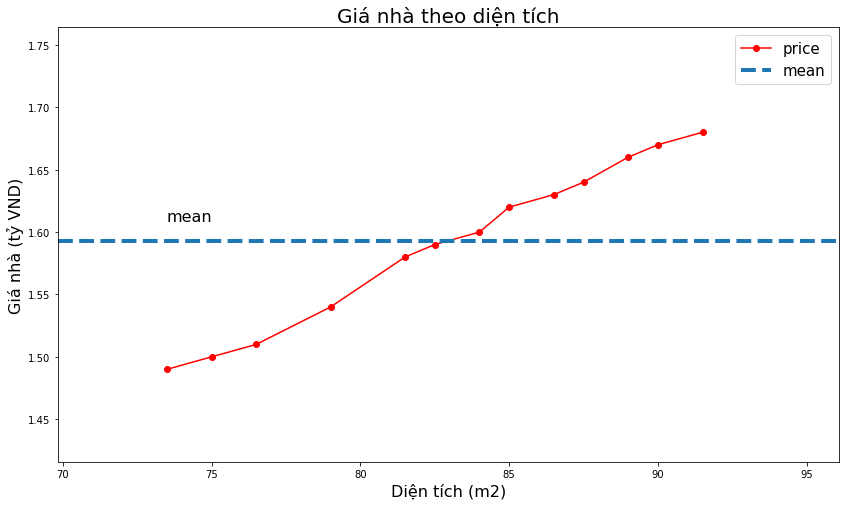

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
# area
x = np.array([[73.5,75.,76.5,79.,81.5,82.5,84.,85.,86.5,87.5,89.,90.,91.5]]).T
# price
y = np.array([[1.49,1.50,1.51,1.54,1.58,1.59,1.60,1.62,1.63,1.64,1.66,1.67,1.68]]).T

# Visualize data
def _plot(x, y, title="", xlabel="", ylabel=""):
  plt.figure(figsize=(14, 8))
  plt.plot(x, y, 'r-o', label="price")
  x_min = np.min(x)
  x_max = np.max(x)
  y_min = np.min(y)
  y_max = np.max(y)
  # mean price
  ybar = np.mean(y)
  plt.axhline(ybar, linestyle='--', linewidth=4, label="mean")
  plt.axis([x_min*0.95, x_max*1.05, y_min*0.95, y_max*1.05])
  plt.xlabel(xlabel, fontsize=16)
  plt.ylabel(ylabel, fontsize=16)
  plt.text(x_min, ybar*1.01, "mean", fontsize=16)
  plt.legend(fontsize=15)
  plt.title(title, fontsize=20)
  plt.show()

_plot(x, y, 
      title='Giá nhà theo diện tích',  
      xlabel='Diện tích (m2)', 
      ylabel='Giá nhà (tỷ VND)')

Tính $w_0, w_1$

In [2]:
# tính trung bình
xbar = np.mean(x)
ybar = np.mean(y)
x2bar = np.mean(x**2)
xybar = np.mean(x*y)

# tính w0, w1
w1 = (xbar*ybar-xybar)/(xbar**2-(x2bar))
w0 = ybar-w1*xbar

print('w1: ', w1)
print('w0: ', w0)

w1:  0.011184099238793658
w0:  0.6626458979418968


Như vậy ta có thể tìm được lời giải của phương trình hồi qui tuyến tính đơn biến thông qua đạo hàm bậc nhất. Tuy nhiên bài toán với phương trình hồi qui tuyến đa biến thì lời giải sẽ phức tạp hơn một chút vì chúng ta sẽ cần tới kiến thức về giải tích ma trận.

# 2.3. Hồi qui tuyến tính đa biến

Hồi qui tuyến tính đa biến là hồi qui tuyến tính với nhiều hơn một biến đầu vào. Hồi qui tuyến tính đa biến phổ biến hơn so với đơn biến vì trên thực tế rất hiếm các tác vụ dự báo chỉ gồm một biến đầu vào. Phương trình hồi qui của nó có dạng:

$$\hat{y_i} = f(x_1, x_2, \dots, x_p) = w_0 + w_1 x_{i1} + \dots + w_p x_{ip} = \mathbf{w}^{\intercal}\mathbf{x}_i$$

Ở đây ta xem $\mathbf{x}_i$ là một véc tơ đại diện cho quan sát thứ $i$. Cụ thể nó gồm các giá trị $(x_{i1}, x_{i2},\dots,x_{ip})$. Ma trận $\mathbf{X}$ có kích thước $n \times p$ có mỗi dòng là một quan sát và mỗi cột là một biến. Giá trị $x_{ip}$ là quan sát thứ $i$ của biến thứ $p$. Ma trận mở rộng của $\mathbf{X}$ được ký hiệu là $\bar{\mathbf{X}}$ chính là ma trận có thêm véc tơ cột $\mathbf{1}$ được thêm vào đầu tiên. Khi đó đối với toàn bộ tập dữ liệu ta có:

$$\mathbf{\hat{y}} = f(\mathbf{X}) = 
\begin{bmatrix}
    1  & x_{11} & \dots  & x_{1p}  \\
    1  & x_{21} & \dots  & x_{2p}  \\
    \vdots & \vdots & \ddots & \vdots \\
    1  & x_{n1} & \dots  & x_{np}
\end{bmatrix}\begin{bmatrix}
    w_{0}  \\
    w_{1}  \\
    \vdots \\
    w_{p}
\end{bmatrix}
= \bar{\mathbf{X}}\mathbf{w}$$


véc tơ sai số giữa $y-\hat{y}$ có thể được biểu diễn bởi:

$$\mathbf{e} = \mathbf{y}-\mathbf{\hat{y}} = \mathbf{y}-\bar{\mathbf{X}}\mathbf{w}$$

Hàm mất mát MSE là trung bình tổng bình phương của các sai số nên nó có dạng:

$$\mathcal{L}(\mathbf{w}) = \frac{1}{2n} \sum_{i = 1}^{n}(y_i - \hat{y_i})^2 = \frac{1}{2} \mathbf{e}^{\intercal}\mathbf{e} = (\mathbf{y}-\bar{\mathbf{X}}\mathbf{w})^{\intercal}(\mathbf{y}-\bar{\mathbf{X}}\mathbf{w}) = ||\bar{\mathbf{X}}\mathbf{w} - \mathbf{y}||_{2}^{2}$$

Ký hiệu $||\bar{\mathbf{X}}\mathbf{w} - \mathbf{y}||_{2}^{2}$ chính là bình phương của norm chuẩn bậc hai mà các bạn đã được tìm hiểu ở chương đại số. Bằng cách khai triển đại số tuyến tính ta tính được đạo hàm hàm mất mát:

$$\frac{\partial\mathcal{L}(\partial\mathbf{w})}{\mathbf{w}} = \mathbf{\bar{X}}^{\intercal}(\mathbf{\bar{X}}\mathbf{w} - \mathbf{y})$$

Nghiệm của phương trình hồi qui:

$$\mathbf{w} = (\mathbf{\bar{X}^{\intercal}\bar{X}})^{-1}\mathbf{\bar{X}}^{\intercal}\mathbf{y} = (\mathbf{A}^{-1}\mathbf{b})$$

Ở Trên để ta đã rút gọn $\mathbf{A} = \mathbf{\bar{X}^{\intercal}\bar{X}}$ và $\mathbf{\bar{X}}^{\intercal}\mathbf{y} = \mathbf{b}$

Phương hình hồi qui đa biến có nghiệm khi $\mathbf{A}$ là khả nghịch.

Bạn đọc có thể không cần hiểu hết công thức đạo hàm và khai triển ma trận ở trên. Mình cũng không khuyến nghị các bạn hồi qui đa biến từ đầu bởi tất cả đã được gói gọn trong hàm LinearRegression của thư viện sklearn.

# 2.4. Diễn giải xác suất của hồi qui tuyến tính

Dưới góc nhìn của xác suất chúng ta có thể chứng minh được những ước lượng đạt được từ hồi qui tuyến tính dựa trên việc tối thiểu hoá tổng bình phương sai số từ hàm MSE là hoàn toàn **tự nhiên** và **hợp lý**.

Thật vậy, chúng ta giả định biến mục tiêu và biến dầu vào liên hệ với nhau qua phương trình:

$$y_i = \mathbf{w}^{\intercal}\mathbf{x}_i + \epsilon_i$$

Trong đó $\epsion_i$ đại diện cho sai số ngẫu nhiên mà bất kì phương trình nào cũng có. Đó là những yếu tố không thể giải thích được bởi mô hình. Do ước lượng của chúng ta là không chệch nên sai số ngẫu nhiên này được giả định là thoả mãn một số tính chất theo giả thuyết của `Gauss-Markov`:

  1. Các sai số $\epsilon_i$ là đại lượng ngẫu nhiên có kỳ vọng bằng 0.

$$\mathbf{E}(\epsilon) = 0$$

  2. Các sai số ngẫu nhiên không có sự tương quan.

$$\mathbf{E}(\epsilon_i, \epsilon_j) = 0$$

  3. Phương sai của sai số ngẫu nhiên là bất biến.

$$\text{Var}(\epsilon)=\sigma^2$$

  4. Sai số ngẫu nhiên $e_i$ và các biến dầu vào $\mathbf{x}_i$ không có sự tương quan.

$$\text{Cov}(\mathbf{x}_i, \mathbf{\epsilon}) = 0, \forall i=\overline{1, p}$$

Như vậy về bản chất thì các giá trị sai số ngẫu nhiên $\epsilon$ sẽ tạo thành một phân phối Gaussian (hoặc phân phối chuẩn) với trung bình bằng 0 và phương sai bằng $\sigma^2$. Chúng ta có thể ký hiệu phân phối này dưới dạng $\epsilon_i ~ N(0, \sigma^2)$. Bạn đọc có thể xem thêm về phân phối Gaussian tại [2.1 Phân phối gaussian](https://phamdinhkhanh.github.io/deepai-book/ch_probability/appendix_probability.html#phan-phoi-chuan-gaussian-distribution). Tại mỗi một điểm $\epsilon_i$ thì hàm mật độ xác suất là:

$$pdf(\epsilon_i) = \frac{1}{\sqrt{2\pi \sigma^2}}\exp \left( -\frac{\epsilon_i^2}{2\sigma^2}\right)$$

Thay $\epsilon_i = y_i-\mathbf{w}^{\intercal}\mathbf{x}_i$ vào hàm mật độ xác suất:

$$pdf(y_i | \mathbf{x}_i; \mathbf{w}) = \frac{1}{\sqrt{2\pi \sigma^2}}\exp \left( -\frac{(y_i - \mathbf{w}^{\intercal}\mathbf{x})^2}{2\sigma^2}\right)$$

Ở trên thì ký hiệu $pdf(y_i | x_i; \mathbf{w})$ cho biết xác suất của $y_i$ tương ứng với $\mathbf{x}_i$ được tham số hoá bởi $\mathbf{w}$. Ở đây $\mathbf{w}$ là đã biết và không được xem như là điều kiện của $y_i$. Đó là lý do vì sao chúng ta không kí hiệu là $pdf(y_i | x_i, \mathbf{w})$ mà phải sử dụng dấu `;`.

Dưới góc độ xác suất thì $pdf(y_i | x_i; \mathbf{w})$ là một hàm phụ thuộc vào dữ liệu đầu vào $\mathbf{x}_i$ khi đã biết trọng số $\mathbf{w}$. Khi muốn xem xác suất dưới góc nhìn như là một hàm của trọng số $\mathbf{w}$ thì đó là hàm hợp lý (_Likelihood_):

$$L(\mathbf{w}) = L(\mathbf{w}; \mathbf{X}, \mathbf{y}) = pdf(\mathbf{y}|\mathbf{X}; \mathbf{w})$$

Theo điều kiện 2 của giả thuyết `Gauss-Markov` thì các phương sai là độc lập nên xác suất đồng thời của dữ liệu bằng tích mật số xác suất của từng điểm dữ liệu và bằng:

$$\begin{eqnarray}
L(\mathbf{w}) & = & \prod_{i=1}^{n} pdf(y_i | x_i; \mathbf{w}) \\
& = & \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi \sigma^2}}\exp \left( -\frac{\epsilon_i^2}{2\sigma^2}\right) \\
\end{eqnarray}$$

Như vậy hàm hợp lý bản chất là một góc nhìn xác suất liên kết sự kiện $y$ với đầu vào $\mathbf{X}$. Vậy đâu sẽ là giá trị $\mathbf{w}$ để mối quan hệ giữa $y$ và $\mathbf{X}$ là phù hợp nhất? Theo ước lượng hợp lý tối đa (_Maximum Likelihood Estimation_) thì chúng ta sẽ lựa chọn $\mathbf{w}$ sao cho hàm $L(\mathbf{w})$ là lớn nhất. Lấy logarith hai vế sẽ tương đương với việc giải bài toán tối ưu:

$$\begin{eqnarray}
\hat{\mathbf{w}} & = & \arg \max \log L(\mathbf{w}) \\
& = & \arg \max \log [\prod_{i=1}^{n}\frac{1}{\sqrt{2\pi \sigma^2}}\exp \left( -\frac{\epsilon_i^2}{2\sigma^2}\right)] \\
& = & \arg \max \sum_{i=1}^{n}\log [\frac{1}{\sqrt{2\pi \sigma^2}}\exp \left( -\frac{\epsilon_i^2}{2\sigma^2}\right)] \\
& = & \arg \max \sum_{i=1}^{n}\ -\frac{1}{2\sigma^2} \epsilon_i^2 - \log{\sqrt{2\pi\sigma^2}} \\
& = & \arg \max \sum_{i=1}^{n}\ -\frac{1}{2\sigma^2} \epsilon_i^2 - \log{\sigma}  - \frac{1}{2}\log{2\pi}
\end{eqnarray}$$

Như vậy việc tối ưu hàm Likelihood tương đương với tối ưu MSE:

$$\frac{\epsilon_i^2}{n} = \frac{(y_i - \hat{y_i})^2}{n}$$

Như vậy dưới góc nhìn xác suất ta đã chứng mình được rằng hồi qui tuyến tính dựa trên tối thiểu hoá tổng bình phương sai số tương đương với quá trình tối ưu hoá _hàm hợp lý_ để tìm ra trong số $\mathbf{w}$ phản ảnh hợp lý nhất mối quan hệ giữa biến mục tiêu và biến đầu vào. Ngoài ra khi các điều kiện của giả thuyết `Gauss-Markov` được thoả mãn thì ước lượng của chúng ta được xem là ước lượng không chệch tốt nhất (_best linear unbiased estimator - BLUE)_. Các giả thuyết về khoảng tin cậy của giá trị dự báo, đánh giá ý nghĩa của các trọng số ước lượng thông qua P-value khi đó có thể được thực hiện dựa trên phân phối chuẩn.

# 2.5. Huấn luyện mô hình hồi qui tuyến tính trên sklearn

Sklearn có thể coi là một package toàn diện của python về data science. Package này có thể cho phép chúng ta huấn luyện hầu hết các mô hình machine learning, xây dựng pipeline, chuẩn hoá và xử lý dữ liệu đầu vào và cross validation dữ liệu.

Vì vai trò quan trọng của sklearn nên tôi sẽ có một chương khác để hướng dẫn chi tiết về cách khai thác package này trong việc huấn luyện mô hình.

Trong phần này chúng ta sẽ cùng tìm hiểu cách huấn luyện mô hình hồi qui tuyến tính trên sklearn. Quay trở lại bài toán trên, nếu chúng ta thêm thông tin về khoảng cách tới trung tâm.

$$\mathbf{x}_2 = [20, 18, 17, 16, 15, 14, 12, 10, 8, 7, 5, 2, 1]$$

Khi đó bài toán trở thành hồi qui đa biến. Trong qui trình xây dựng và huấn luyện mô hình chung chúng ta sẽ lần lượt đi qua các bước chính.

1. Thu thập dữ liệu.
2. Làm sạch dữ liệu.
3. Lựa chọn dữ liệu đầu vào.
4. Chuẩn hoá dữ liệu.
5. Phân chia tập huấn luyện/kiểm tra (_tập train/test_).
6. Huấn luyện và đánh giá mô hình.

Ở bài toán này tôi chỉ muốn cho các bạn thấy cách thức huấn luyện mô hình như thế nào nên chỉ cần thực hiện bước 6.

In [3]:
from sklearn import linear_model

# area
x1 = np.array([[73.5,75.,76.5,79.,81.5,82.5,84.,85.,86.5,87.5,89.,90.,91.5]]).T
# distance to center
x2 = np.array([[20, 18, 17, 16, 15, 14, 12, 10, 8, 7, 5, 2, 1]]).T
# input matrix X
X = np.concatenate([x1, x2], axis = 1)

# price
y = np.array([[1.49,1.50,1.51,1.54,1.58,1.59,1.60,1.62,1.63,1.64,1.66,1.67,1.68]]).T

Tiếp theo chúng ta sẽ vẽ biểu đồ giữa khoảng cách tới trung tâm và giá nhà. Quá trình vẽ biểu đồ này rấy quan trọng vì nó giúp ta có một cái nhìn tổng quan về mối quan hệ giữa các điểm dữ liệu và phát hiện những bất thường dữ liệu.

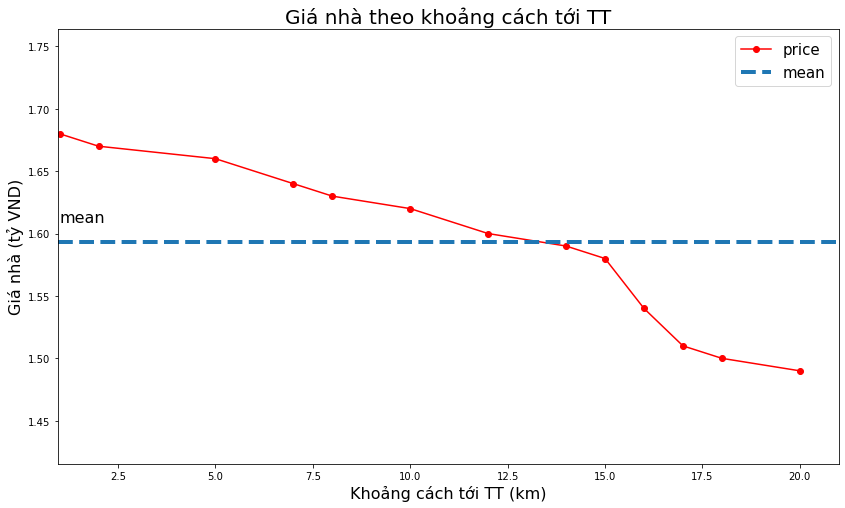

In [4]:
import matplotlib.pyplot as plt

_plot(x2, y, 
      title='Giá nhà theo khoảng cách tới TT',  
      xlabel='Khoảng cách tới TT (km)', 
      ylabel='Giá nhà (tỷ VND)')

Ta nhận thấy rằng khi khoảng cách tới trung tâm giảm thì giá nhà càng tăng. Nhận định này càng củng cố thêm việc lựa chọn biến khoảng cách tới trung tâm làm biến đầu vào là có ý nghĩa. 

Tiếp theo ta sẽ huấn luyện mô hình. Trong sklearn cách thức chung khi huấn luyện mọi mô hình đều là khởi tạo mô hình đó với các tham số và sau đó truyền dữ liệu vào hàm fit để huấn luyện. Đây là đặc điểm mà bạn cần nhớ khi xây dựng mọi mô hình vì nó sẽ lặp lại như vậy.

In [5]:
# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=True) # fit_intercept = False for calculating the bias

regr.fit(X, y)

# Compare two results
print( 'Coefficient : ', regr.coef_ )
print( 'Interception  : ', regr.intercept_ )

Coefficient :  [[0.01252422 0.00130004]]
Interception  :  [0.53665806]


# 2.6. Đồ thị hoá kết quả mô hình

Sau khi đã huấn luyện thành công mô hình chúng ta cần trình bày kết quả của mình dưới một dạng trực quan, dễ hiểu. Đây là một trong những kỹ năng quan trọng vì nó giúp mô hình của bạn trở nên có sức thuyết phục hơn với mọi người. 

Kỹ năng đồ thị hoá sẽ được mình giới thiệu sâu hơn ở một chương khác.

## 2.6.1. Biểu diễn trong không gian 2 chiều

Để thực hiện dự báo thì chỉ cần khởi tạo ma trận $\mathbf{X}$ đầu vào (có các dòng là các quan sát và các cột là các biến) và truyền vào hàm `predict()`. Ta sẽ dự báo giá nhà ngay trên tập huấn luyện.

In [6]:
# Dự báo giá nhà ngay trên tập huấn luyện
ypred = regr.predict(X)

Chúng ta muốn biết giá trị dự báo và giá trị thực tế khác biệt như thế nào thì có thể biểu diễn chúng trên không gian hai chiều theo diện tích hoặc theo khoảng cách tới trung tâm.

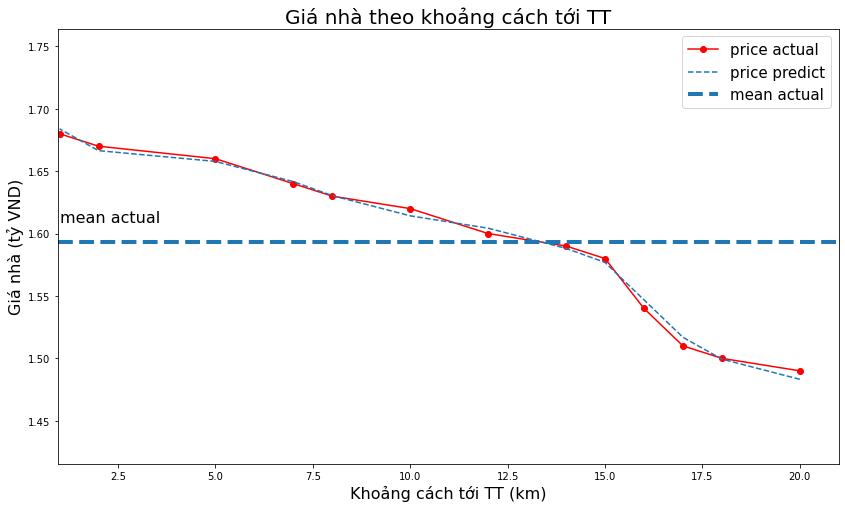

In [7]:
# Visualize data
def _plot_act_pred(x, y_act, y_pred, title="", xlabel="", ylabel=""):
  plt.figure(figsize=(14, 8))
  plt.plot(x, y_act, 'r-o', label="price actual")
  plt.plot(x, y_pred, '--', label="price predict")
  x_min = np.min(x)
  x_max = np.max(x)
  y_min = np.min(y_act)
  y_max = np.max(y_act)
  # mean price
  ybar = np.mean(y_act)
  plt.axhline(ybar, linestyle='--', linewidth=4, label="mean actual")
  plt.axis([x_min*0.95, x_max*1.05, y_min*0.95, y_max*1.05])
  plt.xlabel(xlabel, fontsize=16)
  plt.ylabel(ylabel, fontsize=16)
  plt.text(x_min, ybar*1.01, "mean actual", fontsize=16)
  plt.legend(fontsize=15)
  plt.title(title, fontsize=20)
  plt.show()


_plot_act_pred(x2, y, ypred, 
      title='Giá nhà theo khoảng cách tới TT',  
      xlabel='Khoảng cách tới TT (km)', 
      ylabel='Giá nhà (tỷ VND)')

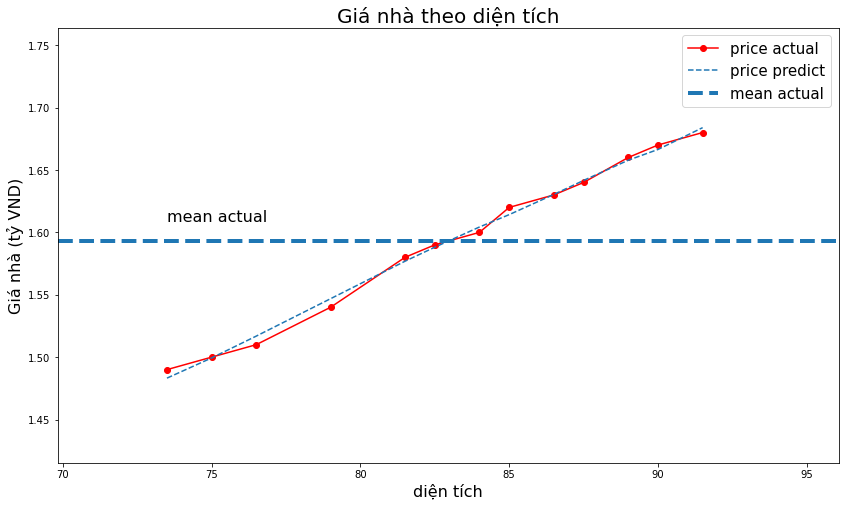

In [8]:
_plot_act_pred(x1, y, ypred, 
      title='Giá nhà theo diện tích',  
      xlabel='diện tích', 
      ylabel='Giá nhà (tỷ VND)')

## 2.6.2. Biểu diễn trong không gian 3 chiều

Không gian 3 chiều sẽ cho chúng ta nhiều thông tin hơn về hình dạng phân bố của biến được dự báo hơn là không gian hai chiều.

Để tạo ra được đồ thị 3 chiều trước tiên chúng ta cần tạo ra một lưới giá trị của $(x_1, x_2)$ thông qua hàm `np.meshgrid()` và sau đó dự báo giá trị của $y$ trên lưới giá trị này. 

Tiếp theo chúng ta sẽ áp dụng phương trình hồi qui vừa huấn luyện được để dự báo mọi mức giá nhà có diện tích trong khoảng từ 90-110 m2 và khoảng cách tới tâm trong khoảng từ 10-30 km.

In [9]:
# Khởi tạo diện tích
x1 = np.arange(90, 111, 1)
x1 = np.expand_dims(x1, axis=1)
# Khởi tạo khoảng cách tới trung tâm
x2 = np.arange(10, 31, 1)
x2 = np.expand_dims(x2, axis=1)
# Ma trận đầu vào
X = np.concatenate([x1, x2], axis = 1)

# Dự báo 
ypred = regr.predict(X)

Tạo lưới giá trị cho mọi điểm $(x_1, x_2)$ trong miền xác định.

In [10]:
# Tạo lưới ma trận
x1grid, x2grid = np.meshgrid(x1, x2)

Dự báo cho mọi điểm $(x_1, x_2)$

In [11]:
ys = []
for i in range(len(x1)):
  x1i=x1grid[:, i:(i+1)]
  x2i=x2grid[:, i:(i+1)]
  X = np.concatenate([x1i, x2i], axis=1)
  yi = regr.predict(X)
  ys.append(yi)

ypred = np.concatenate(ys, axis=1)

Biểu diễn các điểm dữ liệu trong không gian 3 chiều.

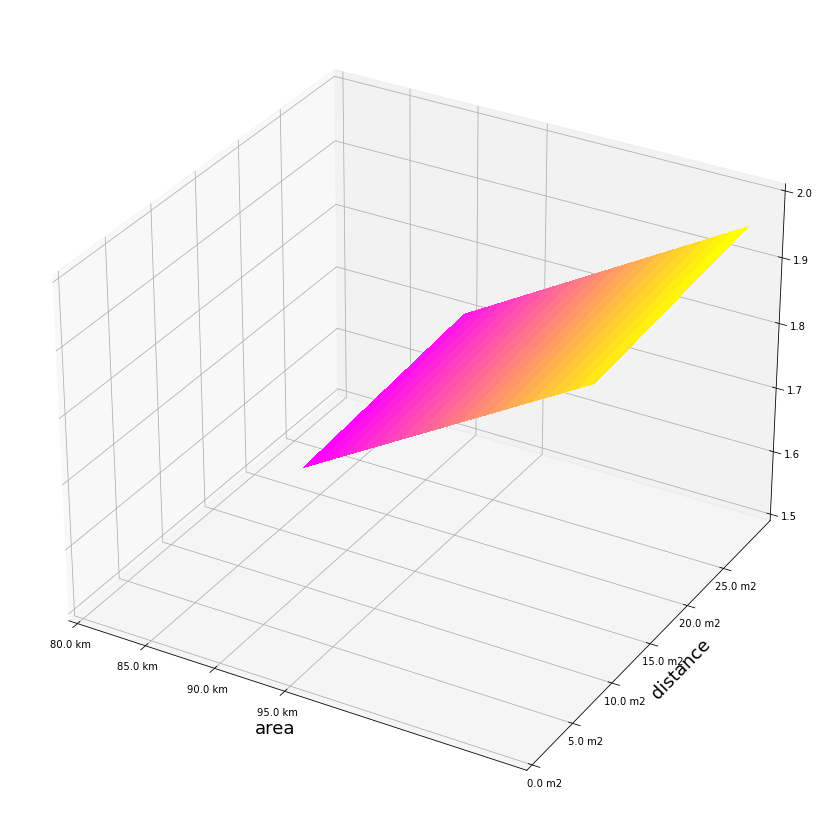

In [12]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(x1grid, x2grid, ypred,cmap=cm.spring,
                       linewidth=0, antialiased=False)


x_pos = np.arange(80.0,100.0, 5)
x_names = [str(x_tick)+ " km" for x_tick in x_pos]
plt.xticks(x_pos, x_names)

y_pos = np.arange(0.0,30.0, 5)
y_names = [str(y_tick)+ " m2" for y_tick in y_pos]
plt.yticks(y_pos, y_names)

ax.set_zlim(1.5, 2.0)
plt.xlabel('area', fontsize=18)
plt.ylabel('distance', fontsize=18)

plt.show()

# 2.7. Đánh gía mô hình hổi qui tuyến tính đa biến

Ngoài MSE là hàm mất mát dùng để làm mục tiêu tối ưu loss function thì chúng ta có thể dựa trên nhiều chỉ số khác để đánh giá một mô hình hồi qui tuyến tính đa biến. Cụ thể như sau:

## 2.7.1. Chỉ số R-squared

R-squared cho ta biết mức độ các biến đầu vào (biến đầu vào) sẽ giải thích được bao nhiêu phần trăm các biến mục tiêu. R-squared càng lớn thì mô hình càng tốt, khi R-squared bằng 95% điều đó có nghĩa rằng các biến đầu vào đã giải thích được 95% sự biến động của biến mục tiêu.

R-squared được xây dựng dựa trên ba chỉ số:

$$TSS = \sum_{i = 1}^{n} (y_i - \bar{y})^2$$
$$RSS = \sum_{i = 1}^{n} (y_i - \hat{y_i})^2$$
$$ESS = \sum_{i = 1}^{n} (\hat{y_i} - \bar{y})^2$$

Trong đó $TSS$ là tổng bình phương sai số toàn bộ mô hình (_Total Sum Squared_), $RSS$ là tổng bình phương sai số ngẫu nhiên (_Residual Sum Squared_), $ESS$ là tổng bình phương sai số được giải thích bởi mô hình (_Explained Sum Squared_)

Ta sẽ chứng mình được $TSS = RSS + ESS$. Thật vậy:

$$
\begin{eqnarray}
TSS & = & \sum_{i = 1}^{n} (y_i - \bar{y})^2 = \sum_{i = 1}^{n} [(y_i - \hat{y_i}) + (\hat{y_i} - \bar{y})]^2 \\
& = & \sum_{i = 1}^{n} (y_i - \hat{y_i})^2 + \sum_{i=1}^{n}(\hat{y_i} - \bar{y})^2 + 2\sum_{i=1}^{N} (y_i - \hat{y_i})(\hat{y_i} - \bar{y}) \\
& = & ESS + RSS + 2\sum_{i=1}^{N} (y_i\hat{y_i} - y_i\bar{y} - \hat{y_i}\hat{y_i} + \hat{y_i}\bar{y}) \\
& = & ESS+RSS + \underbrace{2\sum_{i=1}^{N}\hat{y_i}(y_i-\hat{y_i})}_{A} + \underbrace{2\bar{
y}\sum_{
i=1}^{N} (\hat{y_i} - y_i)}_{B}
\end{eqnarray}
$$

Ta sẽ chứng minh cả hai hạng tử $A$ và $B$ đều bằng 0. Thật vậy, từ phương trình đạo hàm bậc nhất của loss function theo $w_0$ và $w_1$ ta có :

$$\sum_{i=1}^N x_i(y_i-\hat{y_i}) = 0 \tag{3}$$

$$\sum_{i=1}^N (y_i - \hat{y_i}) = 0 \tag{4}$$

Do đó:

$$\bar{
y}\sum_{
i=1}^{N} (\hat{y_i} - y_i) = 0 \leftrightarrow B  = 0$$

Nhân biểu thức (3) với $w_1$ và biểu thức (4) với $w_0$ và cộng vế với vế :

$$
\begin{eqnarray} w_0\sum_{i=1}^N (y_i - \hat{y_i}) + \sum_{i=1}^N w_1x_i(y_i-\hat{y_i}) & = & 0 \\
\leftrightarrow \sum_{i=1}^{N}(w_0+w_1 x_i) (y_i-\hat{y_i}) & = & 0 \\
\leftrightarrow \sum_{i=1}^{N} \hat{y_i}(y_i-\hat{y_i}) & = & 0 \\
\leftrightarrow B & = & 0
\end{eqnarray}
$$

Dòng 2 suy ra 3 là vì $\hat{y_i} = w_0 + w_1 x_i$. Như vậy $A = B = 0$ suy ra $TSS = ESS + RSS$. Chứng minh đẳng thức trên về mặt toán học không quá khó phải không nào ?

Khi đó: 

$$R^2 = 1 - \frac{RSS}{TSS}$$

Như vậy $R^2$ càng lớn thì giá trị tổng bình phương sai số càng nhỏ.

## 2.7.2. Chỉ số MAE và MAPE

MAE là chỉ số đo lường trung bình trị tuyệt đối sai số giữa giá trị dự báo và giá trị thực tế.

$$\text{MAE} = \frac{1}{n}\sum_{i=1}^{n} |y_i -\hat{y_i}|$$

Chúng ta có thể thấy về bản chất thì MAE chính là norm chuẩn bậc 1. Khi MAE càng nhỏ thì khoảng cách giữa giá trị dự báo và giá trị thực tế càng nhỏ và mô hình càng tốt. Tuy nhiên giá trị MAE không bao hàm được sự khác biệt về mặt đơn vị. Ví dụ như khi chúng ta đo lường sai số về cân nặng của những con voi và cân nặng của những con chuột thì khả năng rất cao là voi có sai số lớn hơn so với chuột. Nhưng sai số này lớn là do chúng ta chưa xét đến kích cỡ của voi và chuột. Chính vì thế để loại bỏ sự khác biệt về mặt đơn vị thì chúng ta sử dụng chỉ số MAPE.

MAPE là chỉ số đo lường tỷ lệ phần trăm sai số giữa giá trị dự báo và giá trị thực tế . Nó là viết tắt của cụm từ _mean absolute percentage error_ có công thức như sau:

$$\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n}|\frac{y_i-\hat{y_i}}{y_i}|$$

Khi một mô hình có $\text{MAPE} = 5\text{%}$ ta nói rằng mô hình có trung bình sai số là $5\text{%}$ so với giá trị trung bình.

# 2.8. Ridge regression và Lasso regression

Ridge regression và Lasso regression là hai mô hình hồi qui áp dụng kỹ thuật hiệu chuẩn (_regularization_) để tránh hiện tượng quá khớp (_overfitting_). Trước tiên ta tìm hiểu một chút về _quá khớp_:

_Quá khớp_ là hiện tượng mà mô hình chỉ khớp tốt trên tập dữ liệu huấn luyện nhưng không dự báo tốt trên dữ liệu kiểm tra. Đây là trường hợp thường gặp khi huấn luyện các mô hình machine learning. Hiện tượng này gây ảnh hưởng xấu và dẫn tới mô hình không thể áp dụng được vì các dự báo bị sai khi áp dụng vào thực tiễn. Có nhiều nguyên nhân dẫn tới _quá khớp_. Một trong những nguyên nhân phổ biến đó là tập dữ liệu huấn luyện và dữ liệu dự báo có phân phối khác xa nhau dẫn tới các qui luật học được ở dữ liệu huấn luyện không còn đúng trên dữ liệu dự báo. Hoặc cũng có thể xuất phát từ phía mô hình quá nhiều tham số nên khả năng biểu diễn dữ liệu của nó không mang tính đại diện.

Regularization là kĩ thuật tránh overfiting bằng cách cộng thêm vào loss function thành phần hiệu chuẩn. Thông thường thành phần này ở dạng norm chuẩn bậc 1 hoặc 2 của các hệ số. Trong trường hợp bậc 2 ta gọi là **Ridge regression**:

$$\mathcal{L}(\mathbf{w}) = \frac{1}{n} \sum_{i=1}^{n} (y_i-\hat{y_i})^2 + \alpha||\mathbf{w}||_{2}^2$$

Đối với trường hợp bậc 1 gọi là **Lasso regression**:

$$\mathcal{L}(\mathbf{w}) = \frac{1}{n} \sum_{i=1}^{n} (y_i-\hat{y_i})^2 + \alpha||\mathbf{w}||_1$$

Đối với những hồi qui này thì chúng ta cần tinh chỉnh hệ số $\alpha$ để tìm ra một hệ số là tốt nhất với từng bộ dữ liệu.

Trong trường hợp dữ liệu bị _quá khớp_ nặng thì cần giảm _quá khớp_ bằng cách gia tăng ảnh hưởng của thành phần điều chuẩn (_regularization term_) thông qua tăng hệ số $\alpha$. Nếu mô hình không bị _quá khớp_ thì có thể lựa chọn $\alpha$ gần 0. Trường hợp $\alpha=0$ thì phương trình hồi qui tương đương với hồi qui tuyến tính đa biến.

Bên dưới ta sẽ cùng xây dựng phương trình hồi qui đối với Ridge regression.

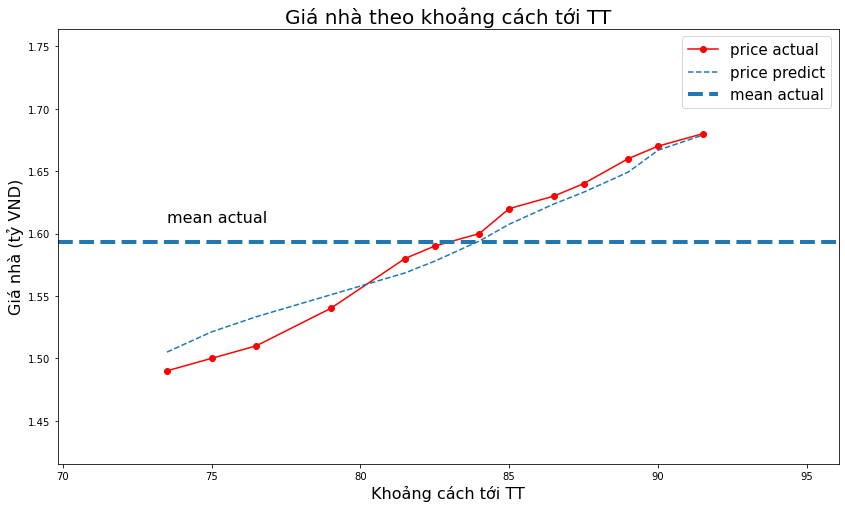

In [13]:
from sklearn.linear_model import Ridge


# area
x1 = np.array([[73.5,75.,76.5,79.,81.5,82.5,84.,85.,86.5,87.5,89.,90.,91.5]]).T
# distance to center
x2 = np.array([[20, 18, 17, 16, 15, 14, 12, 10, 8, 7, 5, 2, 1]]).T
# input matrix X
X = np.concatenate([x1, x2], axis = 1)
# price
y = np.array([[1.49,1.50,1.51,1.54,1.58,1.59,1.60,1.62,1.63,1.64,1.66,1.67,1.68]]).T

rid_regr = Ridge(alpha = 0.3, normalize = True)
rid_regr.fit(X, y)

y_pred_rid = rid_regr.predict(X)

_plot_act_pred(x1, y, y_pred_rid, 
      title='Giá nhà theo khoảng cách tới TT',  
      xlabel='Khoảng cách tới TT', 
      ylabel='Giá nhà (tỷ VND)')

Xây dựng phương trình đối với Lasso regression

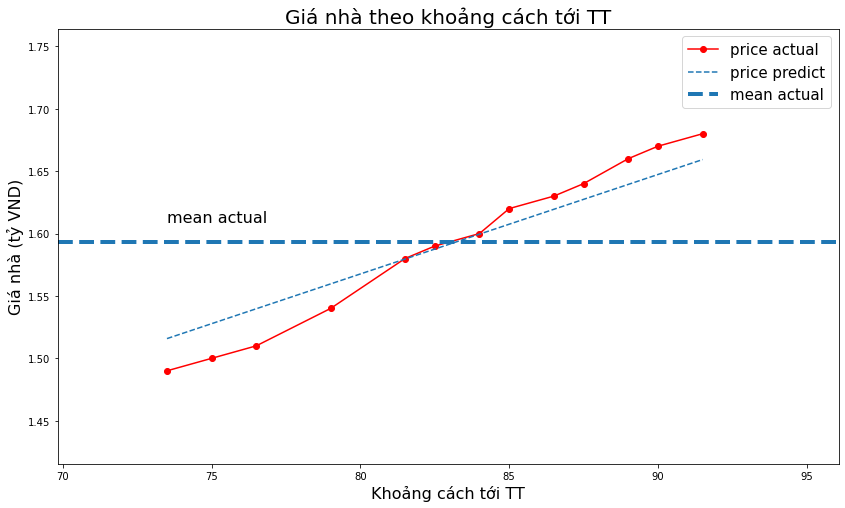

In [14]:
from sklearn.linear_model import Lasso

las_regr = Lasso(alpha = 0.005, normalize = True)
las_regr.fit(X, y)

y_pred_las = las_regr.predict(X)

_plot_act_pred(x1, y, y_pred_las, 
      title='Giá nhà theo khoảng cách tới TT',  
      xlabel='Khoảng cách tới TT', 
      ylabel='Giá nhà (tỷ VND)')

## 2.8.1. Tuning hệ số alpha

Để lựa chọn ra một hệ số alpha phù hợp với mô hình Ridge regression chúng ta sẽ cần phải tạo ra một list các giá trị có thể của tham số này và dùng vòng lặp for để đánh giá mô hình với trên từng giá trị của tham số. Giá trị được lựa chọn là giá trị mà có MSE trên tập kiểm tra là nhỏ nhất.

List các giá trị kể trên còn được gọi là không gian tìm kiếm _grid search_.

Tiếp theo chúng ta sẽ tuning hệ số điều chuẩn $\alpha$ cho mô hình hồi qui.

In [15]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

grid_search = np.arange(0, 1, 0.05)

def _regression(alpha, X_train, y_train, X_test, y_test, models: dict):
  dict_models = {}
  rid_regr = Ridge(alpha = alpha, normalize = True)
  rid_regr.fit(X_train, y_train)
  y_pred = rid_regr.predict(X_test)
  MSE = np.mean((y_test-y_pred)**2)
  dict_models["MSE"] = MSE
  dict_models["model"] = rid_regr
  model_name = "ridge_" + str(alpha)
  models[model_name] = dict_models
  return models

# Phân chia tập huấn luyện, kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(10, 2) (3, 2)
(10, 1) (3, 1)


Huấn luyện mô hình trên grid search.

In [16]:
models = {}
for alpha in grid_search:
  models = _regression(round(alpha, 2), X_train, y_train, X_test, y_test, models)

In kết quả huấn luyện và tìm ra mô hình tốt nhất.

In [17]:
i = 0
for k, v in models.items():
  if i==0:
    best_model = k
    mse = models[k]["MSE"]
  if models[k]["MSE"] < mse:
    best_model = k

  print("model {}, MSE: {}".format(k, models[k]["MSE"]))
  i+=1

print("-----------------------------------------")
print("Best models: {}, MSE: {}".format(best_model, models[best_model]["MSE"]))

model ridge_0.0, MSE: 1.027273909596398e-05
model ridge_0.05, MSE: 8.938384941325164e-05
model ridge_0.1, MSE: 0.00012669594338682118
model ridge_0.15, MSE: 0.00015167042816772354
model ridge_0.2, MSE: 0.00017373506532169893
model ridge_0.25, MSE: 0.00019544713216831185
model ridge_0.3, MSE: 0.0002176453268404164
model ridge_0.35, MSE: 0.00024059809009087634
model ridge_0.4, MSE: 0.00026435311416343933
model ridge_0.45, MSE: 0.0002888664738864604
model ridge_0.5, MSE: 0.00031405669060695487
model ridge_0.55, MSE: 0.0003398292382021084
model ridge_0.6, MSE: 0.0003660881401120962
model ridge_0.65, MSE: 0.00039274149040160994
model ridge_0.7, MSE: 0.0004197039603027203
model ridge_0.75, MSE: 0.00044689775824235554
model ridge_0.8, MSE: 0.0004742527852240873
model ridge_0.85, MSE: 0.0005017063756645284
model ridge_0.9, MSE: 0.0005292028346849019
model ridge_0.95, MSE: 0.0005566928879234227
-----------------------------------------
Best models: ridge_0.0, MSE: 1.027273909596398e-05


Vậy mô hình tốt nhất là Ridge Regression với hệ số $\alpha=0$

# 2.9. Tóm tắt

Như vậy ở chương này các bạn đã được học:

1. Phương trình hồi qui tuyến tính đơn biến và hồi qui tuyến tính đa biến.
2. Hàm mất mát MSE của hồi qui tuyến tính đơn biến.
3. Các chỉ số đánh giá mô hình hồi qui tuyến tính như `R-squared, MAP, MAPE`
4. Các phương pháp hồi qui tuyến tính với thành phần điều chuẩn như Ridge Regresssion và Lasso Regression.
5. Các biểu diễn kết quả mô hình thông qua biểu đồ.
6. Tuning hệ số của mô hình hồi qui.

# 2.10. Bài tập

Từ bộ dữ liệu lưu lượng hành khách sử dụng dịch vụ hàng không qua các năm tại [international airline passengers](https://raw.githubusercontent.com/phamdinhkhanh/LSTM/master/international-airline-passengers.csv) bạn hãy:

1. Phân chia tập huấn luyện/kiểm tra sao cho tập kiểm tra bao gồm 12 tháng cuối cùng và tập huấn luyện gồm các tháng trước đó.
2. Xây dựng phương trình dự báo lưu lượng hành khách theo phương trình hồi qui tuyến tính đơn biến trên tập huấn luyện và đánh giá MSE trên tập kiểm tra.
3. Tạo thêm các biến $x^2, x^3$ và xây dựng phương trình hồi qui tuyến tính đa biến.
4. Huấn luyên mô hình với Ridge Regression và Lasso Regression. Fine tunning hệ số $\alpha$ của thành phần điều chuẩn.